# Qiskit Basics

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram

## 1. Circuit with 1 classical and 1 quantum bit, with NOT gate on qubit

In [2]:
q =  QuantumRegister(1,"qreg") 
c = ClassicalRegister(1,"creg")

qc = QuantumCircuit(q,c)
qc.x(q[0]) 

qc.measure(q[0],c[0])

qc.draw()

┌───┐┌─┐
  qreg: ┤ X ├┤M├
        └───┘└╥┘
creg: 1/══════╩═
              0

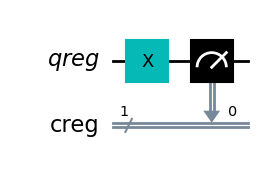

In [4]:
qc.draw(output='mpl') # matplotlib vizualization

In [7]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)
counts = job.result().get_counts(qc)
print(counts)

{'1': 1024}


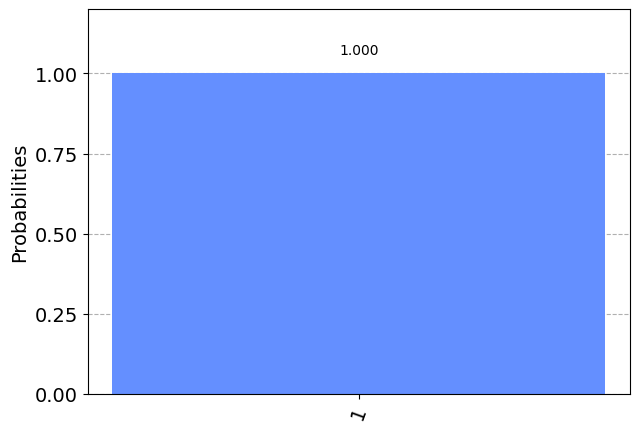

In [9]:
plot_histogram(counts)

## 2. Circuit with 4 classical and 4 quantum bits, with multiple NOT gates on qubits

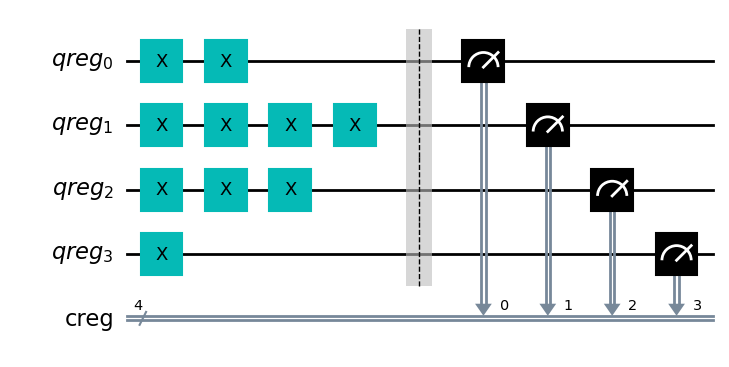

In [10]:
q2 = QuantumRegister(4,"qreg")
c2 = ClassicalRegister(4,"creg")
qc2 = QuantumCircuit(q2,c2)

# apply x-gate to the first quantum bit twice
qc2.x(q2[0])
qc2.x(q2[0])

# apply x-gate to the fourth quantum bit once
qc2.x(q2[3])

# apply x-gate to the third quantum bit three times
qc2.x(q2[2])
qc2.x(q2[2])
qc2.x(q2[2])

# apply x-gate to the second quantum bit four times
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])

qc2.barrier()

qc2.measure(q2,c2)

qc2.draw(output='mpl')

In [11]:
job = execute(qc2, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts(qc2)
print(counts)

{'1100': 100}


## Task 1: Randomly picking an 8-bit binary number

### Problem statement

Design a quantum circuit with 8 quantum bits and 8 classical bits.

For each quantum bit, flip a coin by python, and apply x-gate if the outcome is head.

Measure your quantum bits.

Execute your circuit 10 times.

In [14]:
from random import randrange

x-gate is applied to the qubit with index 2
x-gate is applied to the qubit with index 3
x-gate is applied to the qubit with index 5
x-gate is applied to the qubit with index 6


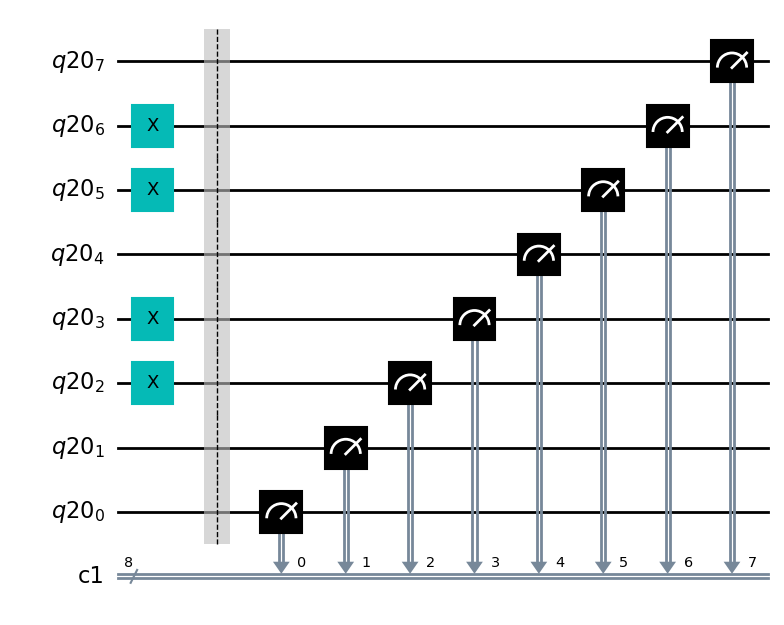

In [15]:
q = QuantumRegister(8)
c = ClassicalRegister(8)

qc = QuantumCircuit(q,c)

picked_qubits=[] 

for i in range(8):
    if randrange(2) == 0: # 0 is Head and 1 is Tail
        qc.x(q[i]) 
        print("x-gate is applied to the qubit with index",i)
        picked_qubits.append(i) 

qc.barrier()
qc.measure(q,c)  
display(qc.draw(output='mpl',reverse_bits=True))